In [1]:
import pandas as pd

df = pd.read_csv("./datasets/cysdb_complete_with_sequences.csv")
df.head(5)

,Entry,cysteineid,resid,ligandable,backus_cravatt_ligandable,cao_backus_ligandable,kuljanin_gygi_ligandable,vinogradova_cravatt_ligandable,yan_backus_ligandable,yang_wang_ligandable,Compound,Ratio,Activity,SMILES,Sequence
0,P23396,P23396_C97,97,yes,yes,yes,NaN,yes,NaN,NaN,ACRYL_1,2.730000,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MAVQISKKRKFVADGIFKAELNEFLTRELAEDGYSGVEVRVTPTRT...
1,P68366,P68366_C295,295,yes,yes,NaN,NaN,NaN,NaN,NaN,ACRYL_1,2.500000,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
2,P68366,P68366_C347,347,yes,yes,NaN,NaN,yes,NaN,NaN,ACRYL_1,3.100000,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
3,Q71U36,Q71U36_C347,347,yes,yes,yes,NaN,NaN,NaN,NaN,ACRYL_1,2.330000,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
4,Q71U36,Q71U36_C376,376,yes,yes,NaN,NaN,NaN,NaN,NaN,ACRYL_1,4.560000,1,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12266799,Q9H074,Q9H074_C470,470,yes,NaN,yes,NaN,NaN,NaN,NaN,OTHER_9,1.416106,0,CC(=O)Nc1cccc(S(=O)(=O)F)c1,MSDGFDRAPGAGRGRSRGLGRGGGGPEGGGFPNGAGPAERARHQPP...
12266800,Q16822,Q16822_C559,559,yes,NaN,yes,NaN,NaN,NaN,NaN,OTHER_9,0.720643,0,CC(=O)Nc1cccc(S(=O)(=O)F)c1,MAALYRPGLRLNWHGLSPLGWPSCRSIQTLRVLSGDLGQLPTGIRD...
12266801,P33176,P33176_C65,65,yes,NaN,yes,yes,NaN,NaN,NaN,OTHER_9,1.196931,0,CC(=O)Nc1cccc(S(=O)(=O)F)c1,MADLAECNIKVMCRFRPLNESEVNRGDKYIAKFQGEDTVVIASKPY...
12266802,Q9P032,Q9P032_C87,87,yes,NaN,yes,NaN,NaN,NaN,NaN,OTHER_9,0.558747,0,CC(=O)Nc1cccc(S(=O)(=O)F)c1,MGALVIRGIRNFNLENRAEREISKMKPSVAPRHPSTNSLLREQISL...


In [1]:
import polars as pl
df = pl.read_csv("./datasets/cysdb_complete_with_sequences.csv")
unique_smiles = df.select(pl.col("SMILES").n_unique()).item()
unique_sequences = df.select(pl.col("Sequence").n_unique()).item()

print(f"Unique SMILES: {unique_smiles}")
print(f"Unique Sequences: {unique_sequences}")

Unique SMILES: 352
Unique Sequences: 9447


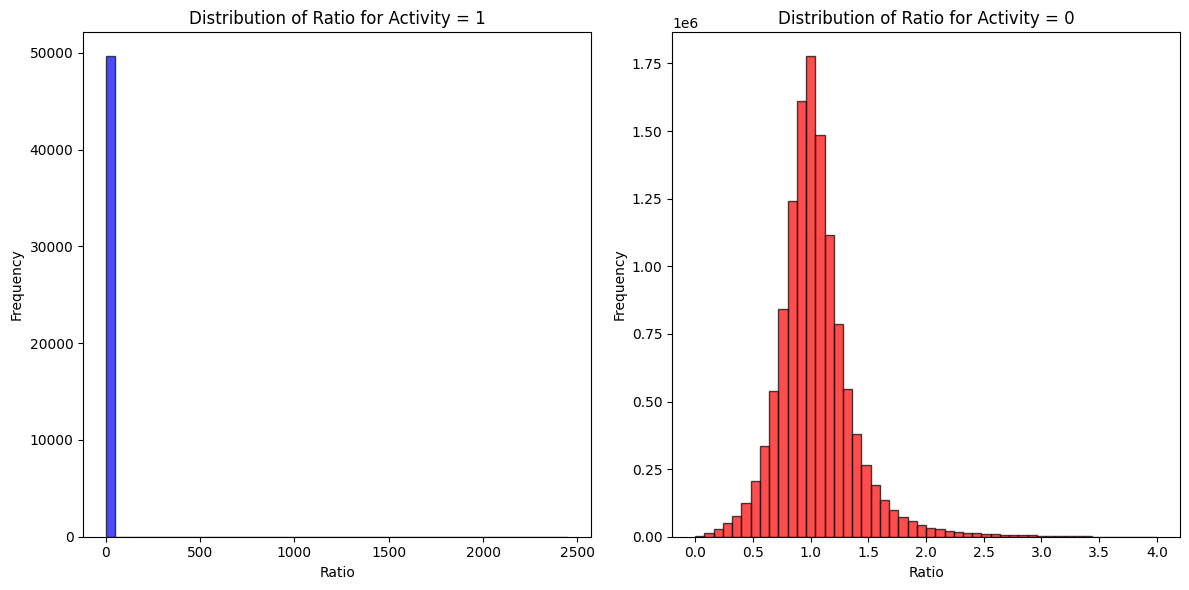

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./datasets/cysdb_complete_with_sequences.csv")

# Filter the dataframe for Activity == 1 and Activity == 0
active_df = df[df['Activity'] == 1]
inactive_df = df[df['Activity'] == 0]

# Create subplots for side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Activity == 1
axes[0].hist(active_df['Ratio'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Ratio for Activity = 1')
axes[0].set_xlabel('Ratio')
axes[0].set_ylabel('Frequency')

# Histogram for Activity == 0
axes[1].hist(inactive_df['Ratio'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title('Distribution of Ratio for Activity = 0')
axes[1].set_xlabel('Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
active_df['Ratio'].describe()

count    49654.000000
mean         6.976580
std         13.178411
min          3.000120
25%          3.546351
50%          4.560000
75%          7.516127
max       2450.000000
Name: Ratio, dtype: float64

In [4]:
inactive_df['Ratio'].describe()

count    1.221715e+07
mean     1.040785e+00
std      3.251861e-01
min      4.590000e-05
25%      8.570000e-01
50%      1.010000e+00
75%      1.180000e+00
max      4.000000e+00
Name: Ratio, dtype: float64

In [ ]:
['Entry','SMILES', 'Sequence', 'Ratio','Activity']

In [2]:
pd.read_csv("./datasets/sampled_negatives.csv").head(5)

,Entry,Sequence,SMILES,Activity
0,Q9NWR8,MLQRGLWPWRTRLLPTPGTWRPARPWPLPPPPQVLRVKLCGNVKYY...,C=CC(=O)NC1(c2ccccc2)CCOCC1,0
1,Q8NF37,MRLRGCGPRAAPASSAGASDARLLAPPGRNPFVHELRLSALQKAQV...,C=CC(=O)N1CCN(C2CC2)c2ccccc21,0
2,Q9HBU6,MLCGRPRSSSDNRNFLRERAGLSSAAVQTRIGNSAASRRSPAARPP...,O=C(CCl)Nc1cc(Cl)ccc1-n1cncn1,0
3,Q8NF37,MRLRGCGPRAAPASSAGASDARLLAPPGRNPFVHELRLSALQKAQV...,C=CC(=O)Nc1cccc(OC(F)F)c1,0
4,Q6ICH7,MVWAPLGPPRTDCLTLLHTPSKDSPKMSLEWLVAWSWSLDGLRDCI...,C=CC(=O)NC1CCN(C(=O)c2ccco2)CC1,0


In [4]:
df.head(5)

,Entry,cysteineid,resid,ligandable,backus_cravatt_ligandable,cao_backus_ligandable,kuljanin_gygi_ligandable,vinogradova_cravatt_ligandable,yan_backus_ligandable,yang_wang_ligandable,Compound,Ratio,Activity,SMILES,Sequence
0,P23396,P23396_C97,97,yes,yes,yes,NaN,yes,NaN,NaN,ACRYL_1,2.73,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MAVQISKKRKFVADGIFKAELNEFLTRELAEDGYSGVEVRVTPTRT...
1,P68366,P68366_C295,295,yes,yes,NaN,NaN,NaN,NaN,NaN,ACRYL_1,2.50,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
2,P68366,P68366_C347,347,yes,yes,NaN,NaN,yes,NaN,NaN,ACRYL_1,3.10,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISVHVGQAGVQMGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
3,Q71U36,Q71U36_C347,347,yes,yes,yes,NaN,NaN,NaN,NaN,ACRYL_1,2.33,0,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGD...
4,Q71U36,Q71U36_C376,376,yes,yes,NaN,NaN,NaN,NaN,NaN,ACRYL_1,4.56,1,C=CC(=O)N(c1ccccc1)c1ccc(Br)cc1,MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGD...


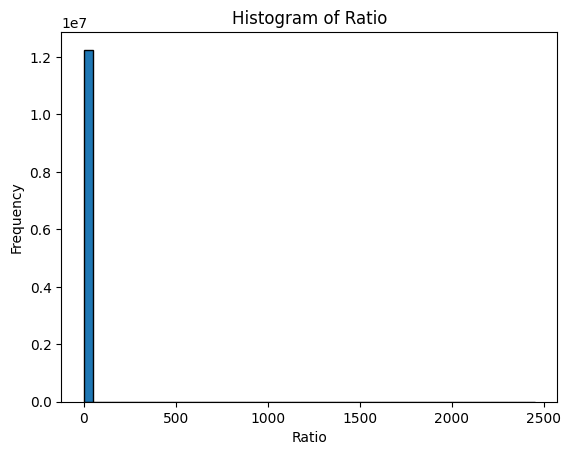

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/cysdb_complete_with_clusters.csv")



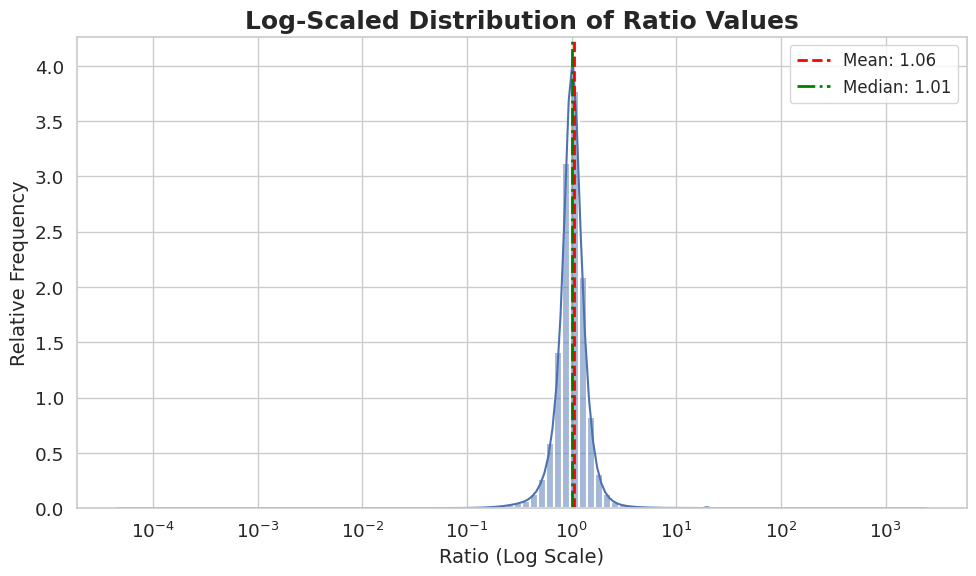

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load your data
# df = pd.read_csv("./datasets/cysdb_complete_with_clusters.csv")
df['Ratio'] = df['Ratio'].astype(float)  # Ensure Ratio is float

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(10, 6))
# Use a log scale on the x-axis to handle skewed data
ax = sns.histplot(df['Ratio'], bins=100, kde=True, color="#4C72B0", edgecolor="white", linewidth=1.5, stat="density", log_scale=True)

# Add titles and labels
plt.title("Log-Scaled Distribution of Ratio Values", fontsize=18, fontweight="bold")
plt.xlabel("Ratio (Log Scale)", fontsize=14)
plt.ylabel("Relative Frequency", fontsize=14)

# Annotate mean and median
mean_val = df['Ratio'].mean()
median_val = df['Ratio'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f"Median: {median_val:.2f}")
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

train = pd.read_csv("./datasets/train.csv")
train.describe()

/tmp/ipykernel_1587894/3938083798.py:3: DtypeWarning: Columns (6,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./datasets/train.csv")


,Ratio,Activity,faiss_cluster,resid
count,99022.000000,99022.000000,99022.000000,49511.000000
mean,4.006800,0.500000,172.961514,429.451051
std,9.792366,0.500003,67.003605,557.034273
min,0.001773,0.000000,0.000000,2.000000
25%,1.006432,0.000000,141.000000,113.000000
50%,3.005523,0.500000,200.000000,258.000000
75%,4.560000,1.000000,200.000000,543.000000
max,2450.000000,1.000000,299.000000,8703.000000


In [1]:
import polars as pl

df = pl.read_csv("chembl_combined.tsv", separator="\t")
df

Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
str,str,str,str,str,str,str,str,str,str,f64,str,f64,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,f64
"""CHEMBL102217""","""""","""None""","""569.28""","""1""","""4.95""","""6""","""Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2c…","""IC50""","""'='""",750.0,"""nM""",6.12,"""""","""""","""UO_0000065""","""10.76""","""0.23""","""1.17""","""3.96""",0,"""CHEMBL806436""","""Inhibition of Src protein tyro…","""B""","""BAO_0000357""","""single protein format""","""Homo sapiens""","""None""","""None""","""None""","""None""","""""","""""","""""","""CHEMBL267""","""Tyrosine-protein kinase SRC""","""Homo sapiens""","""SINGLE PROTEIN""","""CHEMBL1136210""",1,"""Scientific Literature""","""Bioorg Med Chem Lett""","""2003""","""None""","""""","""""","""""",0.75
"""CHEMBL345905""","""""","""None""","""243.35""","""0""","""2.77""","""1B""","""CN1CCC(C[C@H]2Cc3ccccc3C2=O)CC…","""IC50""","""'='""",7.7,"""nM""",8.11,"""""","""""","""UO_0000065""","""33.34""","""0.62""","""5.34""","""39.95""",0,"""CHEMBL643386""","""Inhibition of acetylcholineste…","""B""","""BAO_0000357""","""single protein format""","""None""","""None""","""None""","""None""","""None""","""""","""""","""""","""CHEMBL220""","""Acetylcholinesterase""","""Homo sapiens""","""SINGLE PROTEIN""","""CHEMBL1126158""",1,"""Scientific Literature""","""J Med Chem""","""1992""","""None""","""""","""""","""""",7.7
"""CHEMBL1547145""","""""","""None""","""405.57""","""1""","""6.81""","""SID17432101""","""CCCCc1ccc(NC(S)=Nc2ccc(Nc3ccc(…","""Potency""","""'='""",7079.5,"""nM""",5.15,"""""","""Active""","""UO_0000065""","""""","""""","""""","""""",0,"""CHEMBL1614458""","""PUBCHEM_BIOASSAY: qHTS Assay f…","""F""","""BAO_0000019""","""assay format""","""Homo sapiens""","""None""","""None""","""None""","""None""","""""","""""","""""","""CHEMBL3577""","""Aldehyde dehydrogenase 1A1""","""Homo sapiens""","""SINGLE PROTEIN""","""CHEMBL1201862""",7,"""PubChem BioAssays""","""""","""""","""None""","""""","""""","""""",7.0795
"""CHEMBL1585798""","""""","""None""","""416.54""","""0""","""4.49""","""SID14724961""","""CC(C)(C)C(=O)Nc1ccc(S(=O)(=O)c…","""Potency""","""'='""",44668.4,"""nM""",4.35,"""""","""Not Active""","""UO_0000065""","""""","""""","""""","""""",0,"""CHEMBL1614458""","""PUBCHEM_BIOASSAY: qHTS Assay f…","""F""","""BAO_0000019""","""assay format""","""Homo sapiens""","""None""","""None""","""None""","""None""","""""","""""","""""","""CHEMBL3577""","""Aldehyde dehydrogenase 1A1""","""Homo sapiens""","""SINGLE PROTEIN""","""CHEMBL1201862""",7,"""PubChem BioAssays""","""""","""""","""None""","""""","""""","""""",44.6684
"""CHEMBL1429303""","""""","""None""","""307.42""","""0""","""4.88""","""SID24828124""","""Cc1ccc(NC(S)=Nc2cccc3cnccc23)c…","""Potency""","""'='""",2511.9,"""nM""",5.6,"""""","""Active""","""UO_0000065""","""""","""""","""""","""""",0,"""CHEMBL1614458""","""PUBCHEM_BIOASSAY: qHTS Assay f…","""F""","""BAO_0000019""","""assay format""","""Homo sapiens""","""None""","""None""","""None""","""None""","""""","""""","""""","""CHEMBL3577""","""Aldehyde dehydrogenase 1A1""","""Homo sapiens""","""SINGLE PROTEIN""","""CHEMBL1201862""",7,"""PubChem BioAssays""","""""",